# Démodulation d'un signal en bande de base sur un canal idéal (bruité)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('../../_static/diagram.mplstyle')

# plt.rcParams.update({
#     'font.size': 22,
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Source Sans Pro",
# })

In [2]:
def block(ax, x, y, w, h, txt):
    """Bloc"""
    p = plt.Rectangle((x, y), w, h, facecolor="white", edgecolor="black")
    ax.add_patch(p)
    plt.text(x+w/2, y+h/2, txt, ha="center", va="center")
    
def add(ax, x, y):
    """Sommateur"""
    p = mpatches.Circle((x, y), .5, facecolor="white", edgecolor="black")
    ax.add_artist(p)
    plt.text(x, y, "+", ha="center", va="center")
    
def arrow(ax, x, y, w, h):
    """Flèche"""
    ax.arrow(x, y, w, h, fc="k", ec="k", head_width=0.1, head_length=0.1, linewidth=.5, length_includes_head=True)
    
def label(ax, x, y, txt):
    """Étiquette de texte simple"""
    plt.text(x, y, txt, ha="center", va="center")

def drawing(w, h, debug=False):
    """Fenêtre et axe"""
    fig, ax = plt.subplots(1, 1, figsize=(w,h))
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    if debug:
        p = plt.Rectangle((0, 0), w, h, fill=False, edgecolor="tab:cyan", linewidth=2)
        ax.add_patch(p)
    return fig, ax
    
def saving(ax, filename):
    """Enregistrement et affichage"""
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

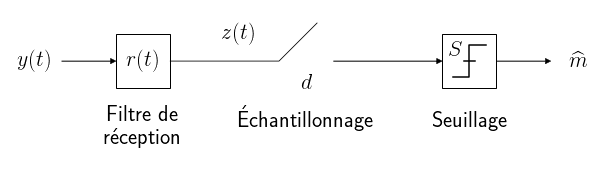

In [3]:
fig, ax = drawing(11, 3, debug=False)

y = 2

# Signal reçu
x = 0.5
label(ax, x , y, "$y(t)$")
arrow(ax, x+0.5 , y, 1, 0)

# Filtre de réception
x = 2
block(ax, x, y-0.5, 1, 1, "$r(t)$")
label(ax, x+0.5, y-1.2, "Filtre de\nréception")

# Échantillonnage
x = 3
plt.plot([x, x+2, x+2+.7], [y, y, y+.7], color="k", linewidth=.8)
label(ax, x+1.25, y+0.5, "$z(t)$")
label(ax, x+2.5, y-0.4, "$d$")
ax.text(x+2.5, y-1.2, "Échantillonnage", ha="center", va="baseline")
arrow(ax, x+3, y, 2, 0)

# Seuillage
x = 8
block(ax, x, y-0.5, 1, 1, "")
ax.plot([x+.2,x+.5,x+.5,x+.8], [y-.3,y-.3,y+.3,y+.3], "k")
ax.plot([x+.4,x+.6], [y,y], "k")
label(ax, x+.25, y+.2, "$S$")
ax.text(x+.5, y-1.2, "Seuillage", ha="center", va="baseline")

# Message
x = 9
arrow(ax, x , y, 1, 0)
label(ax, x+1.5 , y, "$\widehat{m}$")

saving(ax, "demodulation-bruit-bb.svg")